 <div class="alert alert-block alert-info"><font size="5"><center><b><u>Projecte Data Science </u></b></center></font>
     <div class="alert alert-block alert-info"><font size="3"><center><b><u>Predicción sobre las precipitaciones ciudad de Barcelona</u></b></center></font>



\begin{align*}Anton\:Sobrino\end{align*}

\begin{align*}Julio\hspace{2mm}\hspace{2mm}2021\end{align*}</div>

## <span style=color:darkblue>Introducción</span>

El presente estudio analizará los datos recogidos por  una de las  estaciones meteorológicas situadas en barcelona con el fin de poder hacer unas predicciones en que condiciones es más probable que precipite sobre Barcelona.

Las predicciones que tienen que ver con el clima están sujetas a gran cantidad de variables que tienen que con la situación geográfica, características físicas del entorno como pueden ser estar cerca del mar o no, estar en un valle o en una zona elevada, etc., pero también con condiciones como puede ser dirección del viento, humedad ambiental, presión, etc.

Aún teniendo en cuenta estos factores, la climatología es impredecible y cambios repentinos en las condiciones atmosféricas, pueden hacer que las predicciones fallen, sobre todo cuando se hacen predicciones de tipo local.

Para hacer el siguiente estudio, tomaremos principalmente los datos de temperatura y si ha habido o no precipitaciones, pero no prescindiremos de otros datos como los meses, dirección viento etc., porque todos estos parámetros pueden hacer variar nuestra predicción final. A priori la hipótesis con la que trabajaremos serà:

    * 𝐻0 = la temperatura afecta a las precipitaciones
    * H1 = la temperatura no afecta a las precipitaciones.

Los datos los hemos obtenido AEMET (Agencia Española de Meteorología)  con la URL, https://opendata.aemet.es/. Los datos poseen la siguiente estrucutura.

    * fecha: Fecha del dia (AAAA-MM-DD).
    * Indicativo: Indicativo climatológico.
    * Nombre: Nombre (ubicación) de la estación.
    * provincia: Provincia de la estación.
    * altitud: Altitud de la estación en m sobre el nivel del mar.
    * tmed: Temperatura media diaria.
    * Precipitación diaria de 07 a 07(Ip = inferior a 0,1 mm).
    * tmin: Temperatura Mínima del día.
    * horatmin: Hora y minuto de la temperatura mínima.
    * tmax: Temperatura Máxima del día.
    * horatmax: Hora y minuto de la temperatura máxima.
    * dir: Dirección de la racha máxima (decenas de grados)
    * velmedia: Velocidad media del viento.
    * racha: Racha máxima del viento (m/s).
    * horaracha: Hora y minuto de la racha máxima.
  
Hemos descargado los datos desde el 14-06-2017 hasta el 30-06-2021 de la estación meteorológica 0201D de Barcelona . Los datos suministrados por la AEMET anteriores del 14-06-2017, poseen una estructura diferente y menos detallada, por lo que se ha optado por descargar datos posteriores a la fecha indicada hasta el 30 de junio del presente en formato json.
El Dataset se ha importado en MySql WorkBench versión 8.0.025 (community).


El presente estudio está organizado de la siguiente manera:

    1. Importación de datos y librerías.
    2. Exploración y análisis de datos.
        2.1 Variables horas y minutos.
        2.2 Número de observaciones y valores duplicados.
        2.3 La variable 'prec'.
        2.4 Variables numéricas.
        2.5 Variables Categóricas
        2.6 Variables de Temperatura.
    3.  Outliers/ Imbalanced dataset.
        3.1 Imbalanced Dataset.
        3.2 Outliers.
    4. Análisis no supervisado: clustering.
        4.1 Graficar los clusters con PCA.
        4.2 Evaluamos los clusters.
        4.3 Analizando los cluster.
            4.3.1 Analizando las variables categóricas.
            4.3.2 Analizando las Variables numéricas.
    5. Elegir el modelo.
        5.1 Regresión.
            5.1.1 Validar el modelo.
        5.2 modelos de clasificación.
            5.2.1 Validar el rendimiento del modelo
            5.2.2 DecisionTreeClassifier
    6. Predicción
    7. Hipótesis.

    


## <span style=color:darkblue>1. Importación de datos y librerias</span>

In [99]:
#Liberias Basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime,time
import re

# importacion librerias SQL
import mysql.connector

#funciones matemáticas
from scipy.stats import ttest_1samp, ttest_ind, f_oneway

#SMOTE
from imblearn.over_sampling import SMOTE

#Clusters
from sklearn.cluster import KMeans

#Evaulación clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#codo
from kneed import KneeLocator

#PCA
from sklearn.decomposition import PCA

#fitter
from fitter import Fitter, get_common_distributions

#Normalització
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

#Regresión
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Classificación
from sklearn.tree import DecisionTreeClassifier

#selection_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#metriques regresión
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

#Graficar decission tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')


In [100]:
#Conexión BBDD
mydb = mysql.connector.connect(host="127.0.0.1",user="root",password="Zxcvbn123+-",database="datascience_test")
mydb

In [101]:
#Importacion datos
mycursor = mydb.cursor()
df = pd.read_sql('select * from 20170614_20210630', mydb)
df

fecha indicativo     nombre  provincia altitud  tmed prec  tmin  \
0     2017-06-14      0201D  BARCELONA  BARCELONA       6  25,0  0,2  22,0   
1     2017-06-15      0201D  BARCELONA  BARCELONA       6  24,8  0,0  22,5   
2     2017-06-16      0201D  BARCELONA  BARCELONA       6  26,3  0,0  23,3   
3     2017-06-17      0201D  BARCELONA  BARCELONA       6  26,2  0,0  24,3   
4     2017-06-18      0201D  BARCELONA  BARCELONA       6  25,2  0,0  22,6   
...          ...        ...        ...        ...     ...   ...  ...   ...   
1450  2021-06-25      0201D  BARCELONA  BARCELONA       6  22,0  0,0  19,6   
1451  2021-06-26      0201D  BARCELONA  BARCELONA       6  22,8  0,0  20,3   
1452  2021-06-27      0201D  BARCELONA  BARCELONA       6  23,4  0,0  20,8   
1453  2021-06-29      0201D  BARCELONA  BARCELONA       6  23,4  0,0  21,5   
1454  2021-06-30      0201D  BARCELONA  BARCELONA       6  23,4  0,0  21,6   

     horatmin  tmax horatmax dir velmedia racha horaracha  
0       04:40  28,0    14:20  20      4,2   8,9     14:30  
1       00:50  27,2    15:30  20      2,8   6,9     14:00  
2       03:20  29,3    17:00  24      4,4   9,2     16:40  
3       05:10  28,0    11:30  07      3,1   5,6     06:10  
4       23:59  27,8    11:50  20      4,2   6,9     13:50  
...       ...   ...      ...  ..      ...   ...       ...  
1450    04:00  24,3    07:50  20      5,6  12,5     14:30  
1451    02:50  25,2    15:40  20      5,0  10,0     12:20  
1452    05:00  25,9    14:00  20      2,8   6,7     10:50  
1453    03:50  25,2    09:20  14      4,2  11,1     23:40  
1454    04:10  25,2    11:00  04      4,7   9,7     17:50  

[1455 rows x 15 columns]

## <span style=color:darkblue> 2.Exploración y analisis de datos</span>

Todas las columnas fueron importadas en formato string, para evitar problemas de conversión. Procedemos a dar el formato correcto a aquellas columnas que lo requieran.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       1455 non-null   object
 1   indicativo  1455 non-null   object
 2   nombre      1455 non-null   object
 3   provincia   1455 non-null   object
 4   altitud     1455 non-null   object
 5   tmed        1455 non-null   object
 6   prec        1455 non-null   object
 7   tmin        1455 non-null   object
 8   horatmin    1455 non-null   object
 9   tmax        1455 non-null   object
 10  horatmax    1455 non-null   object
 11  dir         1455 non-null   object
 12  velmedia    1455 non-null   object
 13  racha       1455 non-null   object
 14  horaracha   1455 non-null   object
dtypes: object(15)
memory usage: 170.6+ KB


In [103]:
#cambio de object a float
df['tmed']= df['tmed'].str.replace(',','.').astype(float)
df['prec']= df['prec'].str.replace(',','.').astype(float)
df['tmin']= df['tmin'].str.replace(',','.').astype(float)
df['tmax']= df['tmax'].str.replace(',','.').astype(float)
df['dir']= df['dir'].str.replace(',','.').astype(float)
df['racha']= df['racha'].str.replace(',','.').astype(float)
#La velocidad media esta expresada en m/s. La medida temporal que hemos usado es el minuto. Vamos a trasnforar este dato a floa
df['velmedia'] =df['velmedia'].str.replace(',','.').astype(float) 

In [104]:
#cambio de object a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format= '%Y/%m/%d')

In [105]:
# Creación de dos columans mes y año.
df['Year'] =df['fecha'].dt.year
df['Month']= df['fecha'].dt.month
df['Day']= df['fecha'].dt.day

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       1455 non-null   datetime64[ns]
 1   indicativo  1455 non-null   object        
 2   nombre      1455 non-null   object        
 3   provincia   1455 non-null   object        
 4   altitud     1455 non-null   object        
 5   tmed        1455 non-null   float64       
 6   prec        1455 non-null   float64       
 7   tmin        1455 non-null   float64       
 8   horatmin    1455 non-null   object        
 9   tmax        1455 non-null   float64       
 10  horatmax    1455 non-null   object        
 11  dir         1455 non-null   float64       
 12  velmedia    1455 non-null   float64       
 13  racha       1455 non-null   float64       
 14  horaracha   1455 non-null   object        
 15  Year        1455 non-null   int64         
 16  Month       1455 non-nul

#### <span style=color:darkblue>2.1 Variable horas y minutos</span>

Para ayudar a Machine Leanring vamos a convertir las variables horas en minutos.

In [107]:
desglose = df['horatmin'].str.split(':', expand=True)
desglose.columns = ['horatmin_h','horatmin_m']
df= pd.concat([df,desglose], axis=1)
df['horatmin_h'] = pd.to_numeric(df.horatmin_h, errors='coerce')* 60
df['horatmin_m'] = pd.to_numeric(df.horatmin_m, errors='coerce')
df['horatmin_min'] = df['horatmin_h'] + df['horatmin_m']
df =df.drop(['horatmin_h','horatmin_m'], axis=1)

In [108]:
desglose = df['horatmax'].str.split(':', expand=True)
desglose.columns = ['horatmax_h','horatmax_m']
df= pd.concat([df,desglose], axis=1)
df['horatmax_h'] = pd.to_numeric(df.horatmax_h, errors='coerce')* 60
df['horatmax_m'] = pd.to_numeric(df.horatmax_m, errors='coerce')
df['horatmax_min'] = df['horatmax_h'] + df['horatmax_m']
df = df.drop(['horatmax_h','horatmax_m'], axis=1)

In [109]:
desglose = df['horaracha'].str.split(':', expand=True)
desglose.columns = ['horaracha_h','horaracha_m']
df= pd.concat([df,desglose], axis=1)
df['horaracha_h'] = pd.to_numeric(df.horaracha_h, errors='coerce')* 60
df['horaracha_m'] = pd.to_numeric(df.horaracha_m, errors='coerce')
df['horaracha_min'] = df['horaracha_h'] + df['horaracha_m']
df = df.drop(['horaracha_h','horaracha_m'], axis=1)

#### <span style=color:darkblue> 2.2 Numero de observaciones y valores duplicados</span>

In [110]:
df.shape

(1455, 21)

In [111]:
#observamos la ausencia de valores nulos
df.isnull().sum()

fecha             0
indicativo        0
nombre            0
provincia         0
altitud           0
tmed              0
prec              0
tmin              0
horatmin          0
tmax              0
horatmax          0
dir               0
velmedia          0
racha             0
horaracha         0
Year              0
Month             0
Day               0
horatmin_min     30
horatmax_min      5
horaracha_min    79
dtype: int64

In [112]:
df[['horatmin_min','horatmax_min','horaracha_min']]=df[['horatmin_min','horatmax_min','horaracha_min']].apply(lambda x: x.fillna(x.mean()),axis=0)

In [113]:
df.describe()

tmed    prec    tmin    tmax     dir  velmedia   racha    Year  \
count 1455.00 1455.00 1455.00 1455.00 1455.00   1455.00 1455.00 1455.00   
mean    17.45    1.48   14.36   20.53   24.81      3.53    9.63 2018.98   
std      5.68    6.33    5.94    5.56   21.18      1.52    3.51    1.24   
min      2.70    0.00    0.10    4.60    1.00      0.00    3.90 2017.00   
25%     12.60    0.00    9.40   15.70   12.00      2.50    7.20 2018.00   
50%     16.70    0.00   13.60   19.90   21.00      3.30    8.90 2019.00   
75%     22.45    0.00   19.60   25.45   28.00      4.20   11.40 2020.00   
max     30.00   83.90   27.10   35.20   99.00     18.30   29.40 2021.00   

        Month     Day  horatmin_min  horatmax_min  horaracha_min  
count 1455.00 1455.00       1455.00       1455.00        1455.00  
mean     6.52   15.81        473.59        745.51         757.97  
std      3.43    8.82        401.72        177.90         315.41  
min      1.00    1.00         10.00         10.00          10.00  
25%      4.00    8.00        260.00        650.00         610.00  
50%      6.00   16.00        340.00        770.00         800.00  
75%      9.00   23.00        440.00        850.00         940.00  
max     12.00   31.00       1439.00       1439.00        1439.00

#### <span style=color:darkblue> 2.3 Variable 'prec'</span>

El objetivo del estudio es poder hacer análisis sobre las precipitaciones. En consecuencia, a priori, usaremos para las predicciones la variable respuesta 'prec' del dataframe.

<AxesSubplot:>

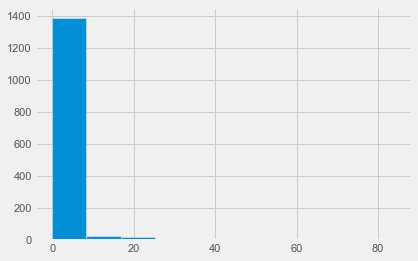

In [114]:
df.prec.hist()

In [115]:
df.prec

0      0.20
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
1450   0.00
1451   0.00
1452   0.00
1453   0.00
1454   0.00
Name: prec, Length: 1455, dtype: float64

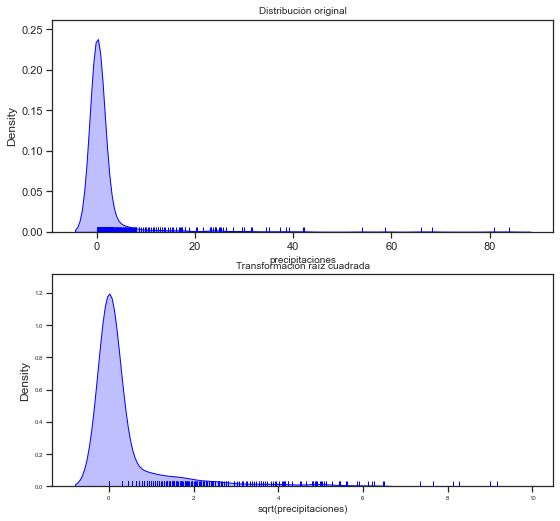

In [116]:
sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
sns.distplot(
    df.prec,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'small')
axes[0].set_xlabel('precipitaciones', fontsize='small') 
#axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.prec),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'small')
axes[1].set_xlabel('sqrt(precipitaciones)', fontsize='small') 
axes[1].tick_params(labelsize = 6)




In [117]:
df.skew()

altitud          0.00
tmed             0.16
prec             7.30
tmin             0.15
tmax             0.13
dir              2.61
velmedia         2.38
racha            1.38
Year             0.00
Month           -0.00
Day             -0.01
horatmin_min     1.65
horatmax_min    -0.85
horaracha_min   -0.47
dtype: float64

In [118]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df.prec, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

sumsquare_error      aic       bic  kl_div
expon                0.35  5745.75 -12093.53     inf
exponpow             0.65  1205.65 -11192.56     inf
gamma                0.71  1403.92 -11070.60     inf
logistic             0.74  6056.70 -11022.15     inf
powerlaw             0.77  1084.59 -10963.13     inf
beta                 0.77  6863.76 -10942.41     inf
chi2                 0.78  1339.59 -10944.54     inf
norm                 0.93  6110.04 -10682.49     inf
cauchy               1.04 10993.48 -10523.58     inf

<AxesSubplot:xlabel='Year', ylabel='prec'>

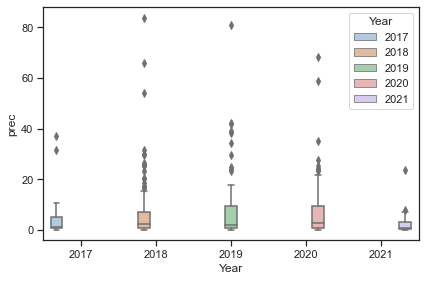

In [119]:
sns.boxplot(x ='Year' ,y ='prec', hue='Year', orient= 'v' ,saturation=0.50, data=df[df.prec > 0],)

__La distribución de la variable respuesta es exponencial. Para los modelos lineales generalizados (GML) la distribución ha de ser de la familia de las exponenciales. Es algo a tener en cuenta. En la gràfica de distribuciones podemos observa la presencia de outliers, algo previsible por la naturaleza del dato. Al final del proceso de análisis y exploración procederemos a normalizar estos outliers, porque pueden desvirtuar nuestra predicción  respuesta 'prec' del dataframe.__



#### <span style=color:darkblue> 2.4 Variable numéricas</span>

In [120]:
df.select_dtypes(include=['float64', 'int64']).describe()

tmed    prec    tmin    tmax     dir  velmedia   racha    Year  \
count 1455.00 1455.00 1455.00 1455.00 1455.00   1455.00 1455.00 1455.00   
mean    17.45    1.48   14.36   20.53   24.81      3.53    9.63 2018.98   
std      5.68    6.33    5.94    5.56   21.18      1.52    3.51    1.24   
min      2.70    0.00    0.10    4.60    1.00      0.00    3.90 2017.00   
25%     12.60    0.00    9.40   15.70   12.00      2.50    7.20 2018.00   
50%     16.70    0.00   13.60   19.90   21.00      3.30    8.90 2019.00   
75%     22.45    0.00   19.60   25.45   28.00      4.20   11.40 2020.00   
max     30.00   83.90   27.10   35.20   99.00     18.30   29.40 2021.00   

        Month     Day  horatmin_min  horatmax_min  horaracha_min  
count 1455.00 1455.00       1455.00       1455.00        1455.00  
mean     6.52   15.81        473.59        745.51         757.97  
std      3.43    8.82        401.72        177.90         315.41  
min      1.00    1.00         10.00         10.00          10.00  
25%      4.00    8.00        260.00        650.00         610.00  
50%      6.00   16.00        340.00        770.00         800.00  
75%      9.00   23.00        440.00        850.00         940.00  
max     12.00   31.00       1439.00       1439.00        1439.00

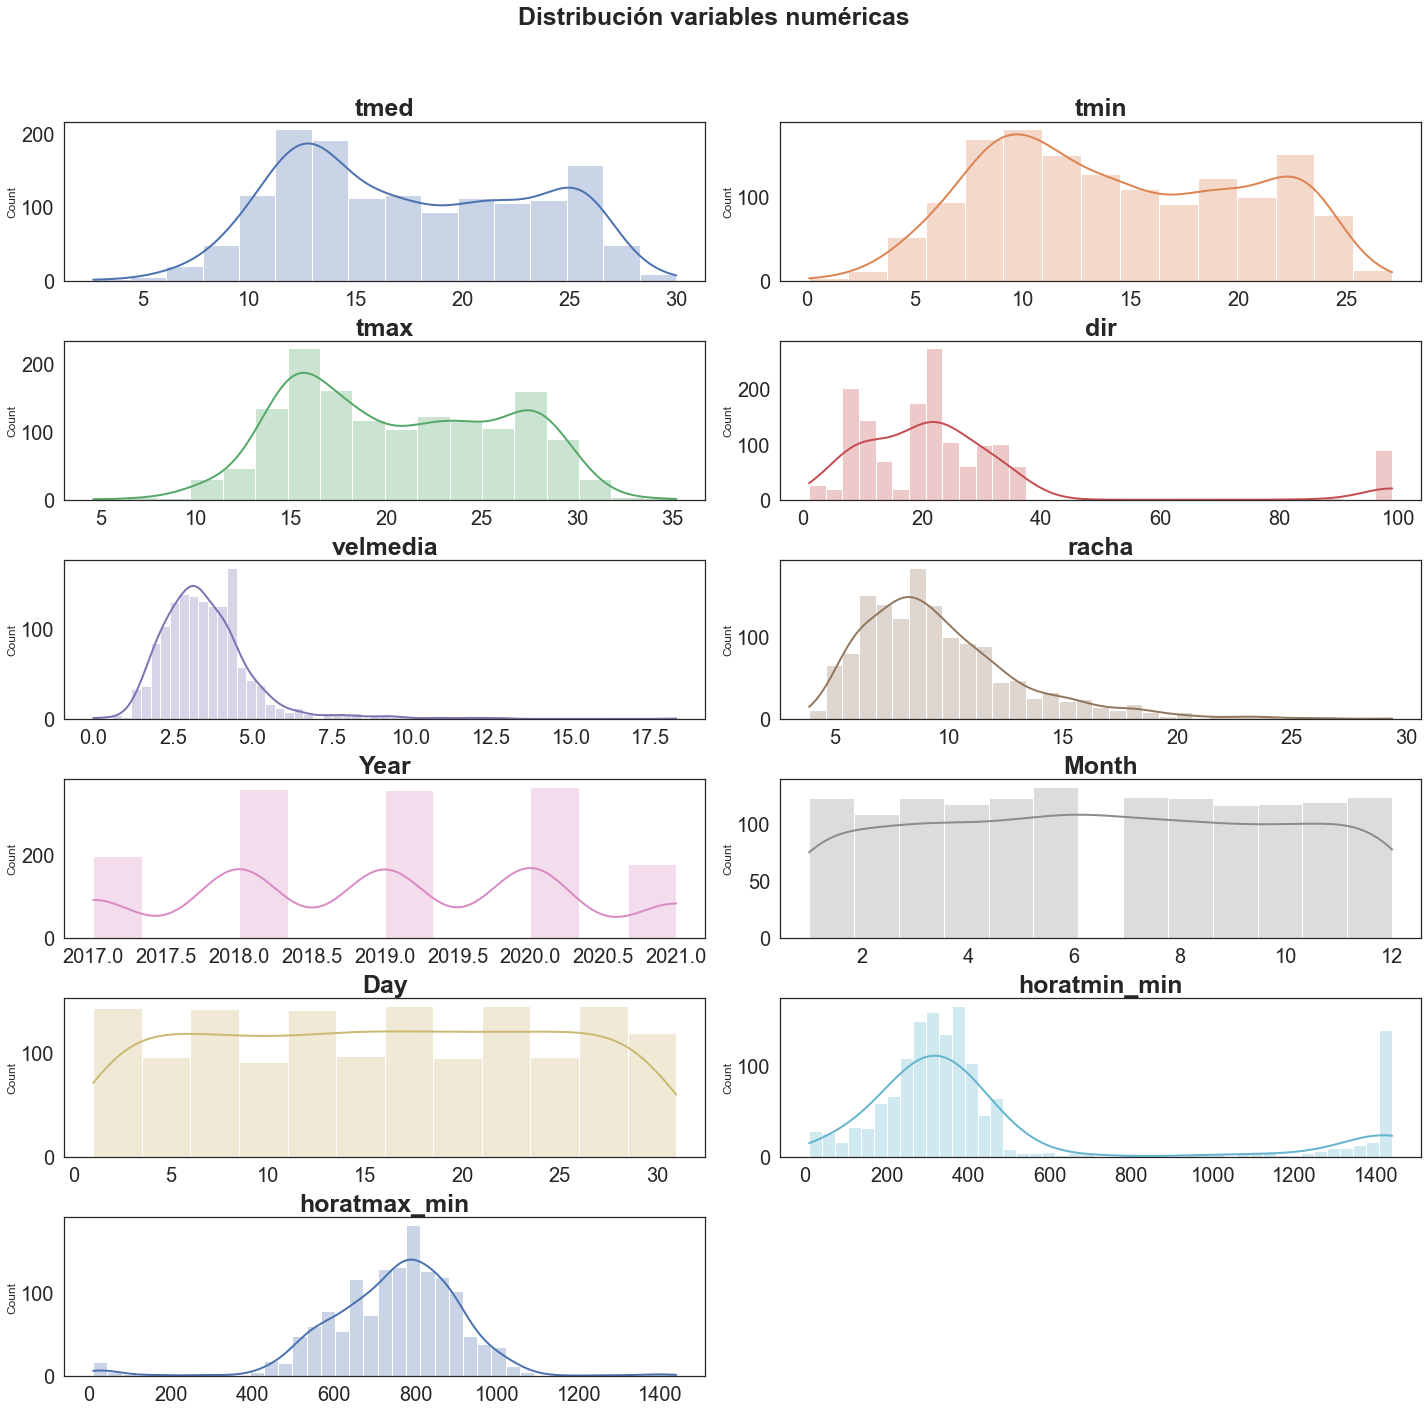

In [121]:
sns.set_theme(style="white")
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('prec')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
for i in [11]:
    fig.delaxes(axes[i])
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 25, fontweight = "bold");

relación variables numéricas  con variable respuesta.

In [122]:
dfcorr = df.corr()

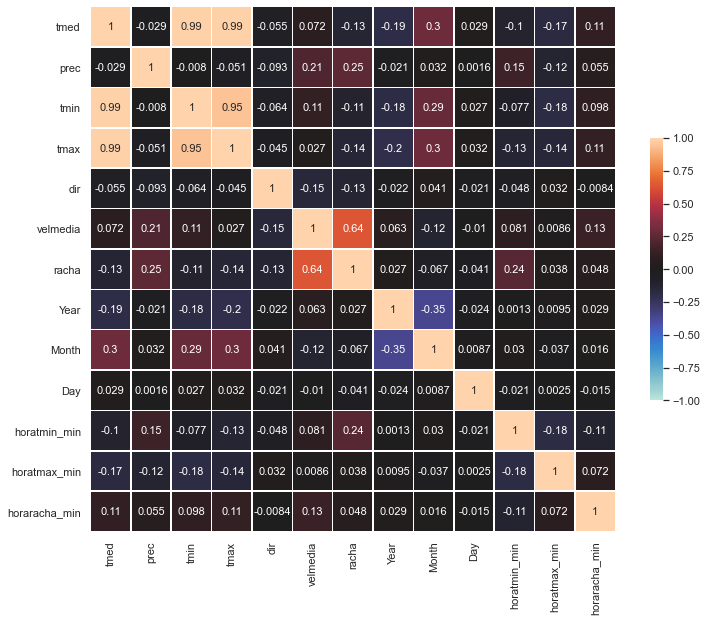

In [123]:
pd.set_option('float_format', '{:.2f}'.format)

f =  plt.subplots(figsize=(11, 9))

sns.heatmap(dfcorr,annot=True,  annot_kws={"size":11}, square=True, linewidths=.5, cbar_kws={"shrink": .5}, robust=False, center=0, vmin=-1, vmax=1)
plt.show()

In [124]:
dfvar = df.var()
dfvar

tmed                32.21
prec                40.08
tmin                35.23
tmax                30.90
dir                448.53
velmedia             2.31
racha               12.32
Year                 1.53
Month               11.79
Day                 77.78
horatmin_min    161382.22
horatmax_min     31648.48
horaracha_min    99482.56
dtype: float64

La correlación entre las variables numéricas en relación a prec no son muy buenas. Difícilmente podremos hacer una modelo de regresión con buenos resultados.

In [125]:
dfcorr.sort_values(by='prec')

tmed  prec  tmin  tmax   dir  velmedia  racha  Year  Month  \
horatmax_min  -0.17 -0.12 -0.18 -0.14  0.03      0.01   0.04  0.01  -0.04   
dir           -0.06 -0.09 -0.06 -0.04  1.00     -0.15  -0.13 -0.02   0.04   
tmax           0.99 -0.05  0.95  1.00 -0.04      0.03  -0.14 -0.20   0.30   
tmed           1.00 -0.03  0.99  0.99 -0.06      0.07  -0.13 -0.19   0.30   
Year          -0.19 -0.02 -0.18 -0.20 -0.02      0.06   0.03  1.00  -0.35   
tmin           0.99 -0.01  1.00  0.95 -0.06      0.11  -0.11 -0.18   0.29   
Day            0.03  0.00  0.03  0.03 -0.02     -0.01  -0.04 -0.02   0.01   
Month          0.30  0.03  0.29  0.30  0.04     -0.12  -0.07 -0.35   1.00   
horaracha_min  0.11  0.06  0.10  0.11 -0.01      0.13   0.05  0.03   0.02   
horatmin_min  -0.10  0.15 -0.08 -0.13 -0.05      0.08   0.24  0.00   0.03   
velmedia       0.07  0.21  0.11  0.03 -0.15      1.00   0.64  0.06  -0.12   
racha         -0.13  0.25 -0.11 -0.14 -0.13      0.64   1.00  0.03  -0.07   
prec          -0.03  1.00 -0.01 -0.05 -0.09      0.21   0.25 -0.02   0.03   

                Day  horatmin_min  horatmax_min  horaracha_min  
horatmax_min   0.00         -0.18          1.00           0.07  
dir           -0.02         -0.05          0.03          -0.01  
tmax           0.03         -0.13         -0.14           0.11  
tmed           0.03         -0.10         -0.17           0.11  
Year          -0.02          0.00          0.01           0.03  
tmin           0.03         -0.08         -0.18           0.10  
Day            1.00         -0.02          0.00          -0.01  
Month          0.01          0.03         -0.04           0.02  
horaracha_min -0.01         -0.11          0.07           1.00  
horatmin_min  -0.02          1.00         -0.18          -0.11  
velmedia      -0.01          0.08          0.01           0.13  
racha         -0.04          0.24          0.04           0.05  
prec           0.00          0.15         -0.12           0.06

#### <span style=color:darkblue> 2.5 Variable categóricas </span>

Las Variables categóricas que había en el dataset o no tienen relevancia porque, o  son constantes o bien las hemos transformado a numericas y analizado en apartados anteriores.

#### <span style=color:darkblue> 2.6 Variable de temperatura </span>

Visualizamos la temperatura media, max y minima porque parecen tener relación con las precipitaciones

<function matplotlib.pyplot.show(close=None, block=None)>

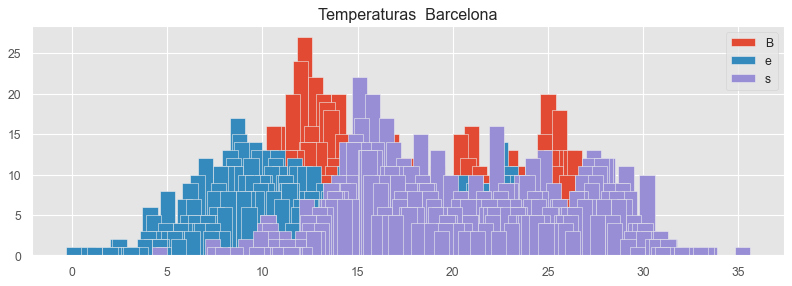

In [126]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10), dpi=80)

ax = fig.add_subplot(3,1,1)
x = df['tmed'].value_counts().keys()
y = df['tmed'].value_counts().values
plt.bar(x, y)



ax1 = fig.add_subplot(3,1,1) #3,1,2
x = df['tmin'].value_counts().keys()
y = df['tmin'].value_counts().values

plt.bar(x, y)


ax2 = fig.add_subplot(3,1,1) # 3,1,3

x = df['tmax'].value_counts().keys()
y = df['tmax'].value_counts().values

plt.bar(x, y)
plt.title('Temperaturas  Barcelona')


plt.legend('Best')
fig.tight_layout()
plt.show

## <span style=color:darkblue>3. Outliers/ Imbalanced dataset</span>

#### <span style=color:darkblue> 3.1 Imbalanced Dataset</span>

Por la naturaleza del dato es previsible, que el número de días que no ha llovido sea superior al número de días que no lo ha hecho. Este hecho produce que el dataset esté descompensado. (Imbalanced Dataset). Aplicaremos el algoritmo SMOTE para generar datos “sintéticos”, que nos igualen el número de días que ha llovido, respecto a los que no lo ha hecho. De esta manera nuestras predicciones serán más ajustadas.

In [127]:
df_imb = pd.DataFrame(df)

In [128]:
df_imb['prec2'] = df_imb['prec'].apply(lambda x : 0 if x == 0 else 1).astype('int64')

<Figure size 288x288 with 0 Axes>

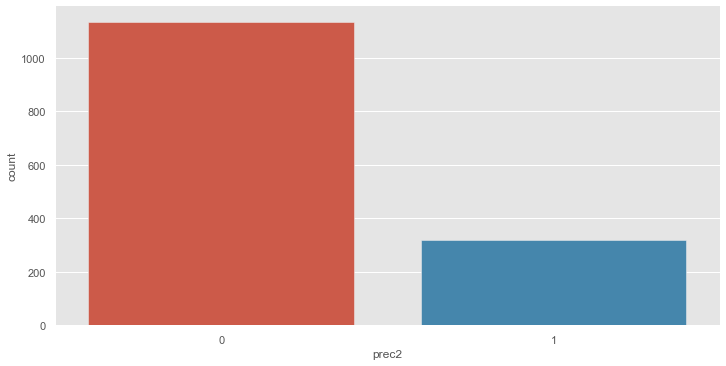

In [129]:
fig = plt.figure(figsize=(4,4))
ax = sns.factorplot('prec2',data=df_imb,kind='count',aspect=2)
plt.show()

In [130]:
df_imb = df_imb[['prec2','tmed', 'tmin', 'tmax', 'dir', 'velmedia', 'racha',
       'horatmin_min', 'horatmax_min', 'horaracha_min']]

In [131]:
df_imb

prec2  tmed  tmin  tmax   dir  velmedia  racha  horatmin_min  \
0         1 25.00 22.00 28.00 20.00      4.20   8.90        280.00   
1         0 24.80 22.50 27.20 20.00      2.80   6.90         50.00   
2         0 26.30 23.30 29.30 24.00      4.40   9.20        200.00   
3         0 26.20 24.30 28.00  7.00      3.10   5.60        310.00   
4         0 25.20 22.60 27.80 20.00      4.20   6.90       1439.00   
...     ...   ...   ...   ...   ...       ...    ...           ...   
1450      0 22.00 19.60 24.30 20.00      5.60  12.50        240.00   
1451      0 22.80 20.30 25.20 20.00      5.00  10.00        170.00   
1452      0 23.40 20.80 25.90 20.00      2.80   6.70        300.00   
1453      0 23.40 21.50 25.20 14.00      4.20  11.10        230.00   
1454      0 23.40 21.60 25.20  4.00      4.70   9.70        250.00   

      horatmax_min  horaracha_min  
0           860.00         870.00  
1           930.00         840.00  
2          1020.00        1000.00  
3           690.00         370.00  
4           710.00         830.00  
...            ...            ...  
1450        470.00         870.00  
1451        940.00         740.00  
1452        840.00         650.00  
1453        560.00        1420.00  
1454        660.00        1070.00  

[1455 rows x 10 columns]

In [132]:
Xsmt = df_imb.loc[:, df_imb.columns != 'prec2'].values
ysmt = df_imb.prec2

In [133]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=100)
Xbal, ybla = sm.fit_resample(Xsmt, ysmt)

In [134]:
dfsmote = pd.concat([pd.DataFrame(Xbal),pd.DataFrame(ybla)], axis = 1)

In [135]:
dfsmote.columns= ['tmed', 'tmin', 'tmax', 'dir', 'velmedia', 'racha',
       'horatmin_min', 'horatmax_min', 'horaracha_min','prec2']

In [136]:
dfsmote

tmed  tmin  tmax   dir  velmedia  racha  horatmin_min  horatmax_min  \
0    25.00 22.00 28.00 20.00      4.20   8.90        280.00        860.00   
1    24.80 22.50 27.20 20.00      2.80   6.90         50.00        930.00   
2    26.30 23.30 29.30 24.00      4.40   9.20        200.00       1020.00   
3    26.20 24.30 28.00  7.00      3.10   5.60        310.00        690.00   
4    25.20 22.60 27.80 20.00      4.20   6.90       1439.00        710.00   
...    ...   ...   ...   ...       ...    ...           ...           ...   
2265 17.12 15.03 19.13  8.78      2.83   8.89         55.56        785.53   
2266 20.90 16.94 24.94 29.91      3.12  10.32        594.29        829.05   
2267 22.78 20.34 25.14 19.14      3.14   8.45       1110.00        840.00   
2268 13.58 12.05 15.19 13.58      7.76  15.42        459.94        755.06   
2269 16.80 14.52 19.08  7.23      3.76   9.54       1402.21        655.47   

      horaracha_min  prec2  
0            870.00      1  
1            840.00      0  
2           1000.00      0  
3            370.00      0  
4            830.00      0  
...             ...    ...  
2265         942.22      1  
2266         761.97      1  
2267         743.74      1  
2268         453.56      1  
2269          48.42      1  

[2270 rows x 10 columns]

<Figure size 288x288 with 0 Axes>

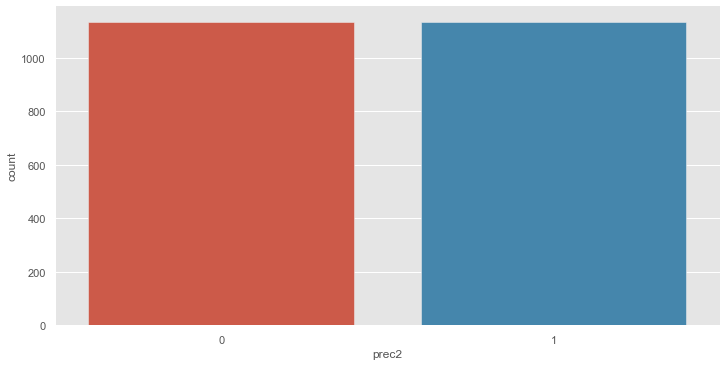

In [137]:
fig = plt.figure(figsize=(4,4))
ax = sns.factorplot('prec2',data=dfsmote,kind='count',aspect=2)
plt.show()

Ahora ya tenemos el dataset compensado, hemos pasado de tener 1455 registros iniciales a  2270.

#### <span style=color:darkblue> 3.2 Outliers </span>

Como hemos visto en el apartado 2.4 sobre las variables numéricas, tenemos puntas de temperatura, velocidad de vientos que son excepcionales y que pueden alterar la predicciones, por ello vamos a procesar los datos con el fin de eliminar estas medidas que estan fuera de lo que seria una distribución normal (outliers).


In [138]:
df2 = pd.DataFrame(dfsmote)

In [139]:
Q1 = df2.quantile(0.10)
Q3 = df2.quantile(0.90)
IQR = Q3 - Q1

In [140]:
df2.shape

(2270, 10)

In [141]:
df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [142]:
df2.shape, df.shape

((2128, 10), (1455, 22))

Hemos pasado de tener 2270 registros a 2128. El Dataframe df2, lo reservaremos para aplicar los modelos predictivos más adelante.

## <span style=color:darkblue>4. Análisis no supervisado: clustering</span>

Crearemos un dataframe con las variables normalizadas, seleccionando las variables que necesitemos para el clustering. Omitiremos aquellas columnas que no aportan información como son indicativo, nombre, provincia, altitud que son valores constantes.

In [143]:
scalerN = Normalizer()

In [144]:
#normalizamos los datos
df_s = scalerN.fit_transform(df2)
df_s

array([[1.99060054e-02, 1.75172847e-02, 2.22947260e-02, ...,
        6.84766584e-01, 6.92728987e-01, 7.96240214e-04],
       [1.97591273e-02, 1.79266276e-02, 2.16713009e-02, ...,
        7.40967273e-01, 6.69260763e-01, 0.00000000e+00],
       [1.82218754e-02, 1.61433345e-02, 2.03004163e-02, ...,
        7.06703912e-01, 6.92846973e-01, 0.00000000e+00],
       ...,
       [1.44304194e-02, 1.28796648e-02, 1.59232788e-02, ...,
        5.32021970e-01, 4.71057513e-01, 6.33359488e-04],
       [1.36610341e-02, 1.21220822e-02, 1.52789735e-02, ...,
        7.59471153e-01, 4.56207411e-01, 1.00583990e-03],
       [1.08461500e-02, 9.37620969e-03, 1.23160903e-02, ...,
        4.23174827e-01, 3.12616126e-02, 6.45604167e-04]])

In [145]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_s)
    
    sse.append(kmeans.inertia_)

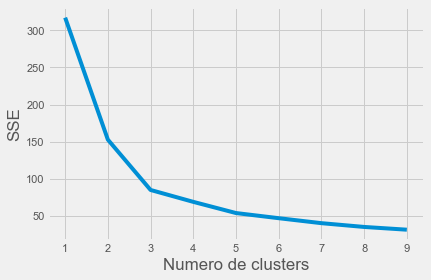

In [146]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Numero de clusters")
plt.ylabel("SSE")
plt.show()

In [147]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

print('El numero de clusters debe ser :',  kl.elbow)

El numero de clusters debe ser : 3


In [148]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)

clustering.fit(df_s)

KMeans(n_clusters=3)

In [149]:
# Añadimos el número de cluster al dataframe original para su analisis.
df2['Kmeans_Clustering']= clustering.labels_

#### <span style=color:darkblue>4.1 Gráficar los clusters con PCA</span>

In [150]:
pca = PCA(n_components=2)

In [151]:
pca1 = pca.fit_transform (df_s)

In [152]:
df_pca = pd.DataFrame(pca1, columns=['componente1', 'componente2'])

In [153]:
df_pca['Kmeans_Clustering']= clustering.labels_

In [154]:
df_pca

componente1  componente2  Kmeans_Clustering
0           -0.22         0.02                  0
1           -0.37         0.10                  0
2           -0.29         0.05                  0
3           -0.02         0.26                  2
4            0.45        -0.12                  1
...           ...          ...                ...
2123        -0.38        -0.04                  0
2124         0.03         0.02                  0
2125         0.33        -0.01                  1
2126         0.07         0.20                  2
2127         0.75         0.18                  1

[2128 rows x 3 columns]

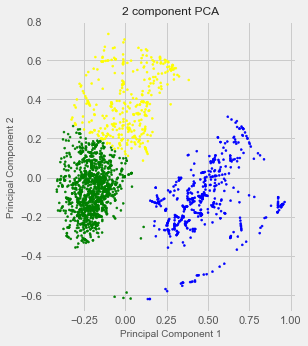

In [155]:
fig = plt.figure(figsize=(4,5))

color_t = np.array(['green','blue','yellow'])

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 12)

ax.scatter(x = df_pca.componente1, y= df_pca.componente2,
          c = color_t[df_pca.Kmeans_Clustering], s=4)


Observamos que tenemos tres clusters bien diferenciados.

#### <span style=color:darkblue>4.2 Evaluamos los clusters</span>

In [156]:
print('Evaulación Kmeans_silhouette:', silhouette_score(df_s, clustering.labels_).round(1))

Evaulación Kmeans_silhouette: 0.6


Silhouette se refiere a un método de interpretación y validación de la coherencia dentro del análisis de grupos, que oscila entre -1 y 1, por lo que podemos afirmar que la configuración es correcta.

#### <span style=color:darkblue>4.3 Analizando los cluster</span>

Comenzaremos observando algunos valores de los diferentes clusters. En primer lugar una vista general de la información registrada en cada cluster.

In [157]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2269
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tmed               2128 non-null   float64
 1   tmin               2128 non-null   float64
 2   tmax               2128 non-null   float64
 3   dir                2128 non-null   float64
 4   velmedia           2128 non-null   float64
 5   racha              2128 non-null   float64
 6   horatmin_min       2128 non-null   float64
 7   horatmax_min       2128 non-null   float64
 8   horaracha_min      2128 non-null   float64
 9   prec2              2128 non-null   int64  
 10  Kmeans_Clustering  2128 non-null   int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 191.2 KB


In [158]:
df2['Kmeans_Clustering'] = df2.Kmeans_Clustering.astype('int64')

In [159]:
print('Componentes por cluster :', df2.groupby('Kmeans_Clustering').size())

Componentes por cluster : Kmeans_Clustering
0    1255
1     514
2     359
dtype: int64


In [160]:
print('Mediana Precipitaciones por Cluster: ', df2.groupby('Kmeans_Clustering')['prec2'].median())

print('Media Precipitaciones por Cluster:', df2.groupby('Kmeans_Clustering')['prec2'].mean())

print('Media Precipitaciones por Cluster:', df2.groupby('Kmeans_Clustering')['prec2'].max())

Mediana Precipitaciones por Cluster:  Kmeans_Clustering
0    0
1    1
2    0
Name: prec2, dtype: int64
Media Precipitaciones por Cluster: Kmeans_Clustering
0   0.43
1   0.77
2   0.41
Name: prec2, dtype: float64
Media Precipitaciones por Cluster: Kmeans_Clustering
0    1
1    1
2    1
Name: prec2, dtype: int64


In [161]:
 df2.groupby(['Kmeans_Clustering'])['prec2'].sum().round(2)

Kmeans_Clustering
0    534
1    395
2    147
Name: prec2, dtype: int64

#### <span style=color:darkblue>4.3.1 Analizando las Vairables categoricas</span>

No hay variables categoricas en el Dataframe seleccionado.

#### <span style=color:darkblue>4.3.2 Analizando las Vairables numericas</span>

Analizaremos cada cluster por separado.

In [162]:
df_C =pd.DataFrame(df2.select_dtypes(include=['float','int64']))
df_C_estadistica = pd.DataFrame()
#df_C_estadistica['Columna']= df_C.columns

In [163]:
df_C0= df2[df_C.Kmeans_Clustering==0]
df_C1= df2[df_C.Kmeans_Clustering==1]
df_C2= df2[df_C.Kmeans_Clustering==2]

In [164]:
df_C_estadistica['mean cluster 0'] = df_C0.mean()
df_C_estadistica['std cluster 0'] = df_C0.std()

df_C_estadistica['mean cluster 1'] = df_C1.mean()
df_C_estadistica['std cluster 1'] = df_C1.std()


df_C_estadistica['mean cluster 2'] = df_C2.mean()
df_C_estadistica['std cluster 2'] = df_C2.std()


In [165]:
df_C_estadistica.round(2)

mean cluster 0  std cluster 0  mean cluster 1  \
tmed                        17.62           5.42           16.95   
tmin                        14.52           5.64           14.18   
tmax                        20.72           5.33           19.71   
dir                         19.60           8.07           17.22   
velmedia                     3.58           1.21            4.04   
racha                        9.69           2.92           12.74   
horatmin_min               301.28         109.21         1278.02   
horatmax_min               767.42         154.19          602.39   
horaracha_min              924.77         199.83          692.49   
prec2                        0.43           0.49            0.77   
Kmeans_Clustering            0.00           0.00            1.00   

                   std cluster 1  mean cluster 2  std cluster 2  
tmed                        5.08           15.95           5.33  
tmin                        4.98           12.89           5.80  
tmax                        5.30           19.00           5.01  
dir                         9.07           20.87          11.84  
velmedia                    1.54            3.41           1.64  
racha                       3.85            9.41           3.39  
horatmin_min              240.87          325.64         137.52  
horatmax_min              266.47          805.13         141.66  
horaracha_min             358.72          308.85         186.45  
prec2                       0.42            0.41           0.49  
Kmeans_Clustering           0.00            2.00           0.00

Observamos que tanto la media como la desviación estándar de las observaciones son bastante similares. En cuanto a la media de las precipitaciones en el cluster 2 es de 4.01 mientras que en los clusters 0 y 1 son 0,92 y 1,03 respectivamente.

## <span style=color:darkblue>5. Elegir el modelo.</span>

Por una lado, en el apartado 2.3 variable respuesta, observamos que la distribución de la variable respuesta era exponencial. Este tipo de distribución se adapta como norma general a los modelos de regresión, pero no había buena correlación  entre nuestra variable respuesta “prec2” y con el resto de variables. Es previsible que una regresión lineal con los datos que tenemos, no sea una buena elección.

#### <span style=color:darkblue>5.1. Regesión</span>

In [166]:
df2 

tmed  tmin  tmax   dir  velmedia  racha  horatmin_min  horatmax_min  \
0    25.00 22.00 28.00 20.00      4.20   8.90        280.00        860.00   
1    24.80 22.50 27.20 20.00      2.80   6.90         50.00        930.00   
2    26.30 23.30 29.30 24.00      4.40   9.20        200.00       1020.00   
3    26.20 24.30 28.00  7.00      3.10   5.60        310.00        690.00   
4    25.20 22.60 27.80 20.00      4.20   6.90       1439.00        710.00   
...    ...   ...   ...   ...       ...    ...           ...           ...   
2265 17.12 15.03 19.13  8.78      2.83   8.89         55.56        785.53   
2266 20.90 16.94 24.94 29.91      3.12  10.32        594.29        829.05   
2267 22.78 20.34 25.14 19.14      3.14   8.45       1110.00        840.00   
2268 13.58 12.05 15.19 13.58      7.76  15.42        459.94        755.06   
2269 16.80 14.52 19.08  7.23      3.76   9.54       1402.21        655.47   

      horaracha_min  prec2  Kmeans_Clustering  
0            870.00      1                  0  
1            840.00      0                  0  
2           1000.00      0                  0  
3            370.00      0                  2  
4            830.00      0                  1  
...             ...    ...                ...  
2265         942.22      1                  0  
2266         761.97      1                  0  
2267         743.74      1                  1  
2268         453.56      1                  2  
2269          48.42      1                  1  

[2128 rows x 11 columns]

In [167]:
#df2 = df2[['prec','tmed','tmin', 'tmax']] 

df2 = df2[['prec2','tmed', 'tmin', 'tmax', 'dir', 'velmedia', 'racha',
       'horatmin_min', 'horatmax_min', 'horaracha_min']]

In [168]:
yr = np.array(df2.prec2).reshape(-1,1)

In [169]:
Xr = np.array(df2.drop(['prec2'],axis=1))

In [170]:
X_train, X_test, y_train, y_test = train_test_split(Xr,yr, test_size=0.3,random_state=4 ) 

In [171]:
X_train= scalerN.fit_transform(X_train)

#### <span style=color:darkblue>5.1.1 Validar el modelo</span>

In [172]:
#recuperamos las variable X y y generadas en el apartado 3.
models=[LinearRegression(), Ridge(), Lasso(),DecisionTreeRegressor(),RandomForestRegressor(random_state=32)]

for model in models:
    model.fit(X_train,y_train)
    prediccions = model.predict(X_test)
    print(type(model).__name__)
    print("   MAE", mean_absolute_error(y_test,prediccions))
    print("   RMSE", (mean_squared_error(y_test,prediccions)))
    print("   R2", r2_score(y_test,prediccions))

LinearRegression
   MAE 244.1340755145745
   RMSE 101683.6301705869
   R2 -406854.0862801001
Ridge
   MAE 376.6891279911446
   RMSE 161559.8815795461
   R2 -646430.0867853195
Lasso
   MAE 0.4999248532009909
   RMSE 0.249943909445553
   R2 -7.19945979192893e-05
DecisionTreeRegressor
   MAE 0.49139280125195617
   RMSE 0.49139280125195617
   R2 -0.9661538461538464
RandomForestRegressor
   MAE 0.49871674491392803
   RMSE 0.2523067292644757
   R2 -0.00952607545320916


Hemos testado varios modelos de regressión y en ninguno de ellos el resultado es bueno.

#### <span style=color:darkblue>5.2 Modelos de clasificación</span>

In [173]:
df2

prec2  tmed  tmin  tmax   dir  velmedia  racha  horatmin_min  \
0         1 25.00 22.00 28.00 20.00      4.20   8.90        280.00   
1         0 24.80 22.50 27.20 20.00      2.80   6.90         50.00   
2         0 26.30 23.30 29.30 24.00      4.40   9.20        200.00   
3         0 26.20 24.30 28.00  7.00      3.10   5.60        310.00   
4         0 25.20 22.60 27.80 20.00      4.20   6.90       1439.00   
...     ...   ...   ...   ...   ...       ...    ...           ...   
2265      1 17.12 15.03 19.13  8.78      2.83   8.89         55.56   
2266      1 20.90 16.94 24.94 29.91      3.12  10.32        594.29   
2267      1 22.78 20.34 25.14 19.14      3.14   8.45       1110.00   
2268      1 13.58 12.05 15.19 13.58      7.76  15.42        459.94   
2269      1 16.80 14.52 19.08  7.23      3.76   9.54       1402.21   

      horatmax_min  horaracha_min  
0           860.00         870.00  
1           930.00         840.00  
2          1020.00        1000.00  
3           690.00         370.00  
4           710.00         830.00  
...            ...            ...  
2265        785.53         942.22  
2266        829.05         761.97  
2267        840.00         743.74  
2268        755.06         453.56  
2269        655.47          48.42  

[2128 rows x 10 columns]

In [174]:
df2 = df2[['prec2','tmed', 'tmin', 'tmax', 'dir', 'velmedia', 'racha',
       'horatmin_min', 'horatmax_min', 'horaracha_min']]

In [175]:
#feature_cols = df3.columns
feature_cols = ['tmed', 'tmin', 'tmax', 'dir', 'velmedia', 'racha',
       'horatmin_min', 'horatmax_min', 'horaracha_min']

In [176]:
yc = np.array(df2.prec2)

In [177]:
Xc =  np.array(df2.drop(['prec2'],axis=1))

In [178]:
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.3, random_state=1) 

In [179]:
#X_train= scalerN.fit_transform(X_train)

In [180]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### <span style=color:darkblue>5.2.1 Validar el rendimiento del modelo</span>

In [181]:
kf = KFold(n_splits=5)
score =clf.score(X_train,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
score_pred = accuracy_score(y_test, y_pred)
print("Metricas cross_validation", scores)
print("Metrica del modelo", score)
print("Media de cross_validation", scores.mean())
print("Metrica en Test", score_pred)

Metricas cross_validation [0.78187919 0.73489933 0.75838926 0.79194631 0.72053872]
Metrica del modelo 1.0
Media de cross_validation 0.7575305628996905
Metrica en Test 0.7949921752738655


La comprobación del rendimiento es buena por lo que proseguimos con nuestro modelo.

#### <span style=color:darkblue>5.2.2  Árbol-DecisionTreeClassifier </span>

In [182]:
dot_data = StringIO()

In [183]:
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


In [184]:
export_graphviz

<function sklearn.tree._export.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)>

In [185]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

In [186]:
graph.write_png('predicción_bcn2.png')

True

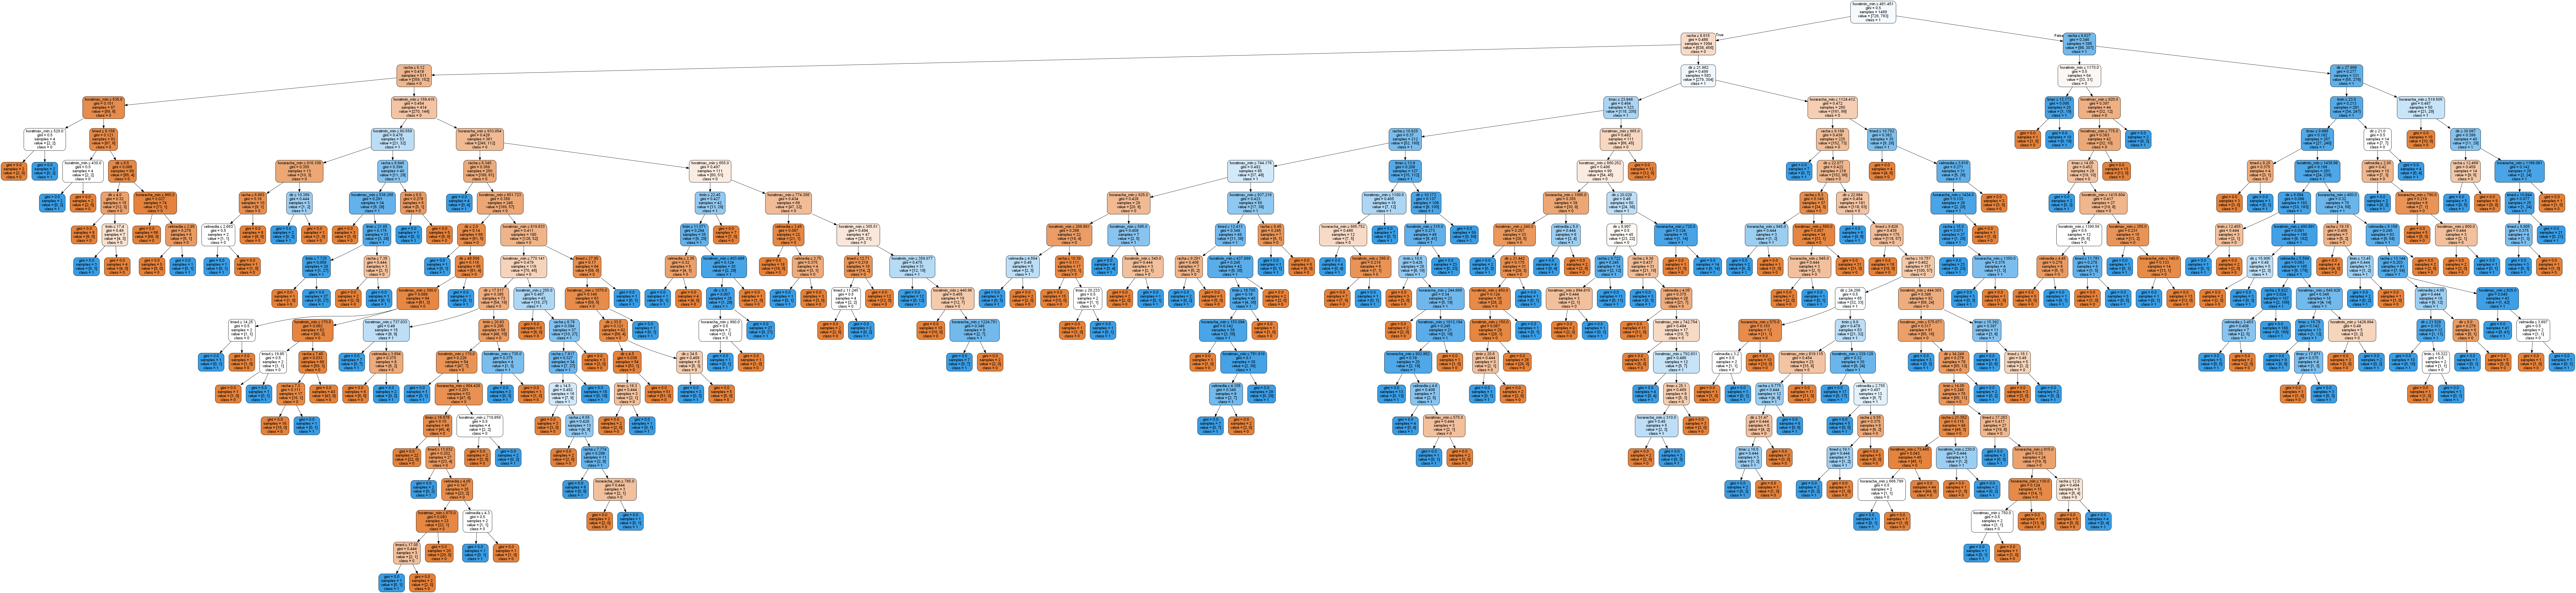

In [187]:
Image(graph.create_png())

## <span style=color:darkblue>6. Predicción.</span>

In [188]:
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

100.0


In [189]:
df_lr=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}, index=list(range(0, 639)))
df_lr.round(3)

Actual  Predicted
0         1          0
1         1          1
2         1          0
3         0          0
4         0          0
..      ...        ...
634       1          1
635       0          0
636       0          0
637       0          1
638       1          1

[639 rows x 2 columns]

## <span style=color:darkblue>7. Hipótesis.</span>

Vamos a analizar el resultado de nuestra hipótesis.

In [190]:
maximo = df2['tmax'][df2['prec2'] == 1]
minimo = df2['tmin'][df2['prec2'] == 1]
medio = df2['tmed'][df2['prec2'] == 1]

In [191]:
# test ANOVA
alfa = 0.05

stat, p = f_oneway(maximo,  minimo, medio)

print(f'F-statistic = {stat:.3f}\np-value = {p:.3f}')
print('No rechazamos H0') if p > alfa else print('Rechazamos H0')

F-statistic = 347.194
p-value = 0.000
Rechazamos H0


Aplicamos el método Nova para comprobar nuestra hipótesis, que queda rechazada.